In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Load the dataset
file_path = 'application_details_18months_2022.xlsx'
df = pd.read_excel(file_path)

df.head(5)

,PUBLICATION_NUMBER,PUBLICATION_DATE,IPO_LOCATION,APPLICATION_TYPE_DESC,APPLICATION_NUMBER,DATE_OF_FILING,TITLE_OF_INVENTION,FIELD_OF_INVENTION,NO_OF_PAGES,NO_OF_CLAIMS,DATE_UPDATED_d_m_y
0,01/2022,2022-01-07,Delhi,DIVISIONAL CONVENTION APPLICATION,1004/DEL/2015,2015-04-10,VOLTAGE CONTROL FOR WIND GENERATORS,ELECTRICAL,19.0,6.0,2023-04-19
1,01/2022,2022-01-07,Delhi,PCT NATIONAL PHASE APPLICATION,10143/DELNP/2011,2011-12-22,"""ROTOR CAN""",ELECTRICAL,23.0,15.0,2023-04-19
2,01/2022,2022-01-07,Chennai,ORDINARY APPLICATION,102/CHE/2010,2010-02-15,SUPER CONDUCTOR LIGHTNING DIVERTOR,ELECTRICAL,17.0,10.0,2023-04-19
3,01/2022,2022-01-07,Delhi,PCT NATIONAL PHASE APPLICATION,10205/DELNP/2015,2015-11-02,FIBRINOGEN BASED TISSUE ADHESIVE PATCHES,BIOCHEMISTRY,35.0,62.0,2023-04-19
4,01/2022,2022-01-07,Delhi,PCT NATIONAL PHASE APPLICATION,10296/DELNP/2011,2011-12-27,"""IMPLANTABLE DRUG DELIVERY DEVICES AND METHODS...",BIOMEDICAL,73.0,25.0,2023-04-19


In [56]:
print(f'Number of records (rows) in the dataset are: {df.shape[0]}')
print(f'Number of features (columns) in the dataset are: {df.shape[1]}')
print(f'Number of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'Number missing values in the dataset are: {sum(df.isnull().sum())}')



Number of records (rows) in the dataset are: 30499
Number of features (columns) in the dataset are: 11
Number of duplicate entries in the dataset are: 10
Number missing values in the dataset are: 77


In [21]:
# Remove duplicate entries
df_cleaned = df.drop_duplicates()

# Get the number of rows after removing duplicates
final_row_count = df_cleaned.shape[0]

print(f"Number of entries after removing duplicates: {df_cleaned.shape[0]}")
print(f'Number of features (columns) in the dataset are: {df.shape[1]}')

Number of entries after removing duplicates: 30489
Number of features (columns) in the dataset are: 11


In [24]:
#to check if dataset have null values
df.isnull().sum()[df.isnull().sum() > 0]

NO_OF_PAGES     48
NO_OF_CLAIMS    29
dtype: int64

In [46]:
desc_stats = df_cleaned.describe()
print("Descriptive Statistics:\n", desc_stats)

Descriptive Statistics:
                     PUBLICATION_DATE                 DATE_OF_FILING  \
count                          30489                          30489   
mean   2022-07-06 14:03:26.159598592  2016-06-14 20:15:13.903374848   
min              2022-01-07 00:00:00            2001-03-12 00:00:00   
25%              2022-04-01 00:00:00            2014-06-23 00:00:00   
50%              2022-07-08 00:00:00            2016-04-20 00:00:00   
75%              2022-10-07 00:00:00            2018-08-03 00:00:00   
max              2022-12-30 00:00:00            2022-06-14 00:00:00   
std                              NaN                            NaN   

        NO_OF_PAGES  NO_OF_CLAIMS   DATE_UPDATED_d_m_y         Month  \
count  30489.000000  30489.000000                30489  30489.000000   
mean      40.066450     17.270032  2023-04-19 00:00:00      6.712749   
min        1.000000      1.000000  2023-04-19 00:00:00      1.000000   
25%       19.000000     10.000000  2023-04-19 0

In [47]:
# Convert PUBLICATION_DATE to datetime
df_cleaned['PUBLICATION_DATE'] = pd.to_datetime(df_cleaned['PUBLICATION_DATE'])

In [48]:
# Extract month and quarter
df_cleaned['Month'] = df_cleaned['PUBLICATION_DATE'].dt.month
df_cleaned['Quarter'] = df_cleaned['PUBLICATION_DATE'].dt.quarter

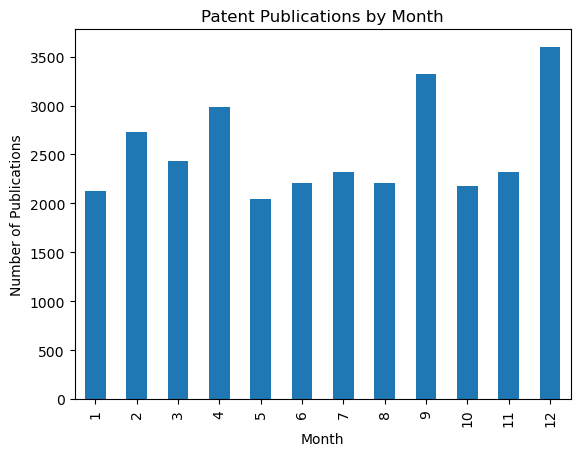

In [49]:
# Analyze publication patterns by month through bar charts
monthly_counts = df_cleaned['Month'].value_counts().sort_index()
monthly_counts.plot(kind='bar')
plt.title('Patent Publications by Month')
plt.xlabel('Month')
plt.ylabel('Number of Publications')
plt.show()

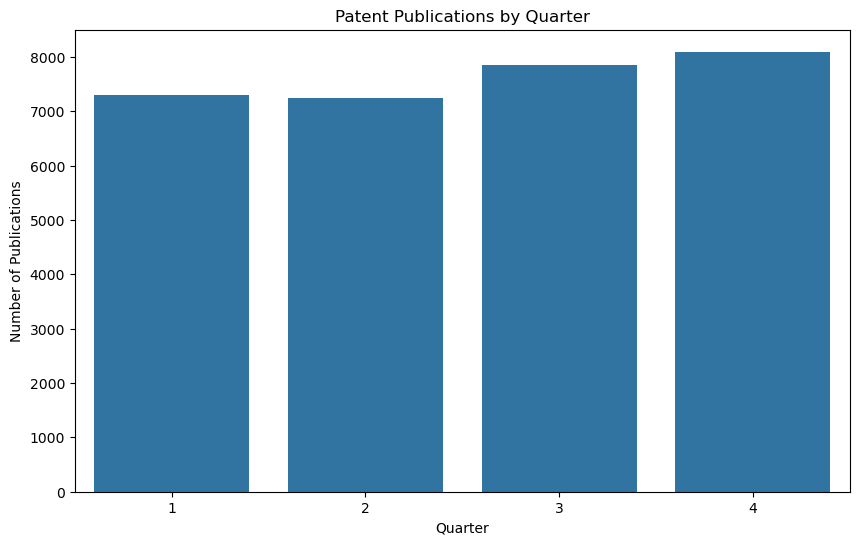

In [50]:
#Analyze publication patterns by quarter through seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Quarter', data=df_cleaned)
plt.title('Patent Publications by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Number of Publications')
plt.show()

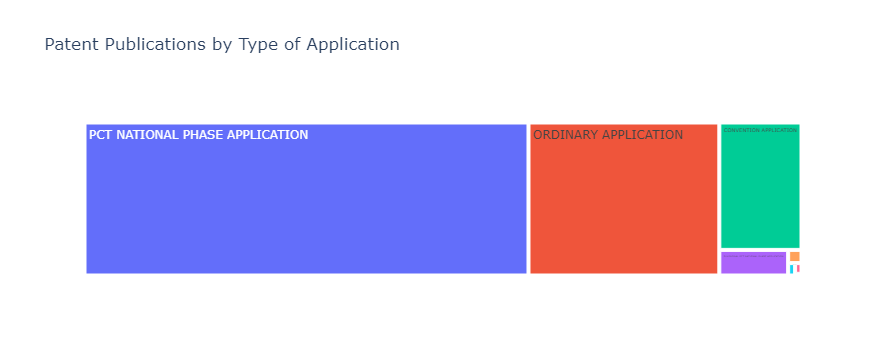

In [51]:
# Treemap for publication patterns by type of patent applications
fig = px.treemap(df_cleaned, path=['APPLICATION_TYPE_DESC'], title='Patent Publications by Type of Application')
fig.show()

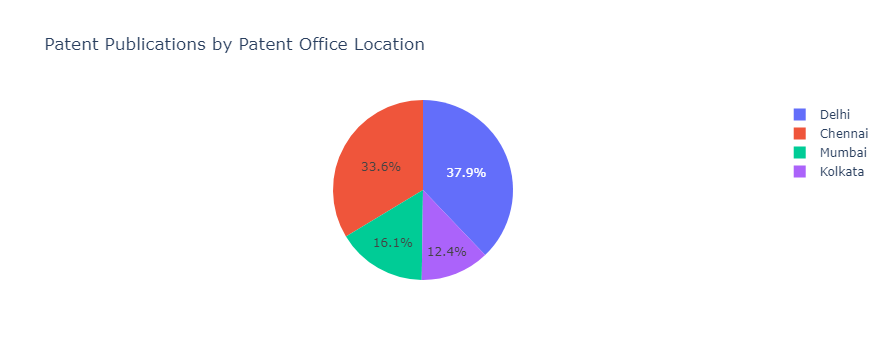

In [52]:
# Pie chart for publication patterns by patent office location
fig = px.pie(df_cleaned, names='IPO_LOCATION', title='Patent Publications by Patent Office Location')
fig.show()

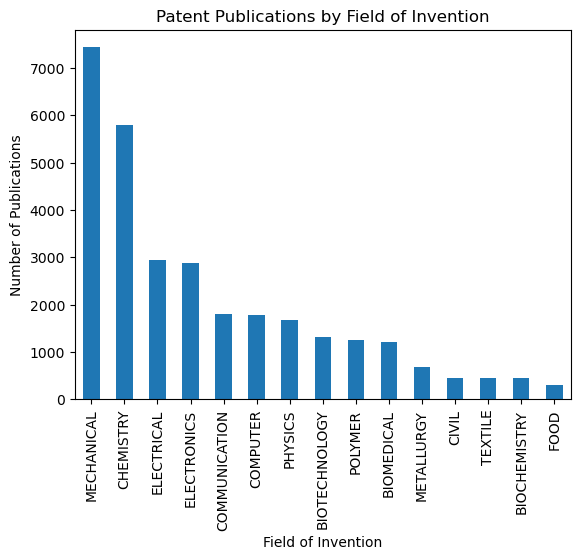

In [53]:
# Analyze publication patterns by field of invention
field_counts = df_cleaned['FIELD_OF_INVENTION'].value_counts()
field_counts.plot(kind='bar')
plt.title('Patent Publications by Field of Invention')
plt.xlabel('Field of Invention')
plt.ylabel('Number of Publications')
plt.show()

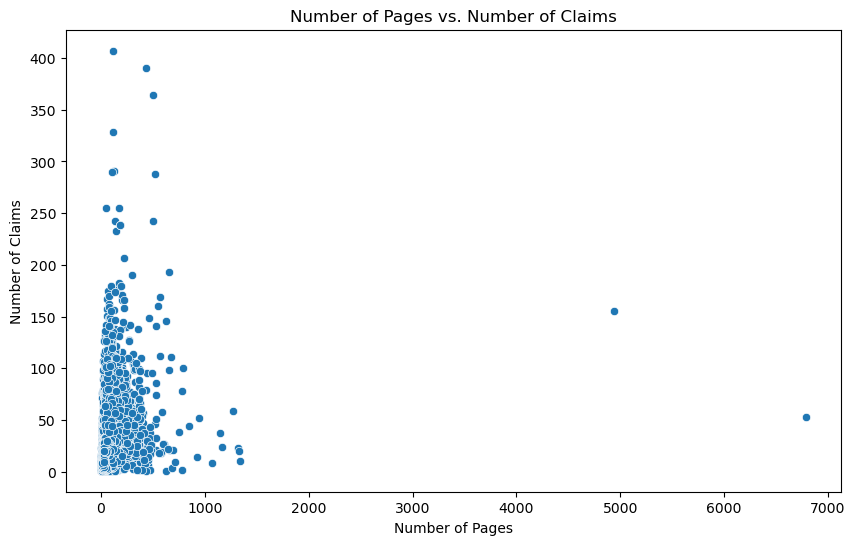

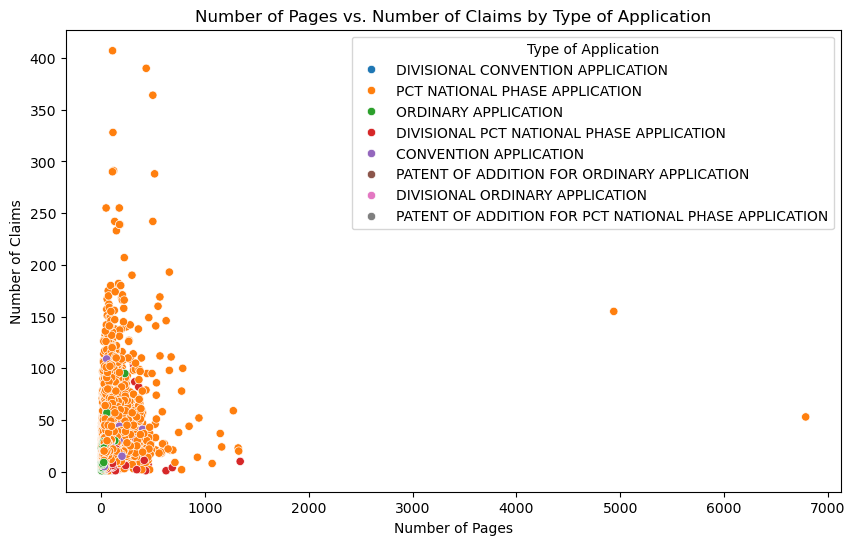

In [54]:
# Scatterplot for NO_OF_PAGES vs. NO_OF_CLAIMS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NO_OF_PAGES', y='NO_OF_CLAIMS', data=df_cleaned)
plt.title('Number of Pages vs. Number of Claims')
plt.xlabel('Number of Pages')
plt.ylabel('Number of Claims')
plt.show()

# Scatterplot for NO_OF_PAGES vs. NO_OF_CLAIMS by type of patent applications
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NO_OF_PAGES', y='NO_OF_CLAIMS', hue='APPLICATION_TYPE_DESC', data=df_cleaned)
plt.title('Number of Pages vs. Number of Claims by Type of Application')
plt.xlabel('Number of Pages')
plt.ylabel('Number of Claims')
plt.legend(title='Type of Application')
plt.show()


In [57]:
# Print conclusions based on visualizations and analysis
def print_conclusions():
    print("Data Cleaning:")
    print("- Removed duplicate entries.")
    print("- Filled missing values with median.")
    
    print("\nDescriptive Statistics:")
    print(desc_stats)
    
    print("\nKey Findings from Visualizations:")
    print("- Most patent publications occur in certain months and quarters.")
    print("- Certain types of patent applications have higher/lower publication counts.")
    print("- Patent office locations show varied publication counts.")
    print("- Fields of invention have distinct publication patterns.")
    
    print("\nCorrelation Analysis:")
    print("- Scatterplots show the relationship between the number of pages and number of claims.")
    
    print("\nOverall Conclusions:")
    print("- The dataset reveals distinct patterns in patent publication based on time, type of application, location, and field.")
    print("- Insights from this analysis can help in understanding trends and making informed decisions in patent filing and processing.")

# Call the function to print conclusions
print_conclusions()


Data Cleaning:
- Removed duplicate entries.
- Filled missing values with median.

Descriptive Statistics:
                    PUBLICATION_DATE                 DATE_OF_FILING  \
count                          30489                          30489   
mean   2022-07-06 14:03:26.159598592  2016-06-14 20:15:13.903374848   
min              2022-01-07 00:00:00            2001-03-12 00:00:00   
25%              2022-04-01 00:00:00            2014-06-23 00:00:00   
50%              2022-07-08 00:00:00            2016-04-20 00:00:00   
75%              2022-10-07 00:00:00            2018-08-03 00:00:00   
max              2022-12-30 00:00:00            2022-06-14 00:00:00   
std                              NaN                            NaN   

        NO_OF_PAGES  NO_OF_CLAIMS   DATE_UPDATED_d_m_y         Month  \
count  30489.000000  30489.000000                30489  30489.000000   
mean      40.066450     17.270032  2023-04-19 00:00:00      6.712749   
min        1.000000      1.000000  202

----------------------------------------------------------------------------------------------------

Prediction model

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [65]:
# Check for missing values
print(df.isnull().sum())

PUBLICATION_NUMBER           0
PUBLICATION_DATE             0
IPO_LOCATION                 0
APPLICATION_TYPE_DESC        0
APPLICATION_NUMBER           0
DATE_OF_FILING               0
TITLE_OF_INVENTION           0
FIELD_OF_INVENTION           0
NO_OF_PAGES                 48
NO_OF_CLAIMS                29
DATE_UPDATED_d_m_y           0
PUBLICATION_DATE_year        0
PUBLICATION_DATE_month       0
DATE_OF_FILING_year          0
DATE_OF_FILING_month         0
DATE_UPDATED_d_m_y_year      0
DATE_UPDATED_d_m_y_month     0
dtype: int64


In [73]:
# Handle date columns
date_columns = ['PUBLICATION_DATE', 'DATE_OF_FILING', 'DATE_UPDATED_d_m_y']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])
    df[f'{col}_year'] = df[col].dt.year
    df[f'{col}_month'] = df[col].dt.month

In [74]:
# Select features for the model
features = ['PUBLICATION_NUMBER', 'IPO_LOCATION', 'APPLICATION_NUMBER', 
            'FIELD_OF_INVENTION', 'NO_OF_PAGES', 'NO_OF_CLAIMS',
            'PUBLICATION_DATE_year', 'PUBLICATION_DATE_month',
            'DATE_OF_FILING_year', 'DATE_OF_FILING_month',
            'DATE_UPDATED_d_m_y_year', 'DATE_UPDATED_d_m_y_month']

In [75]:
X = df[features]
y = df['APPLICATION_TYPE_DESC']

In [76]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Create preprocessor
numeric_features = ['NO_OF_PAGES', 'NO_OF_CLAIMS', 'PUBLICATION_DATE_year', 'PUBLICATION_DATE_month',
                    'DATE_OF_FILING_year', 'DATE_OF_FILING_month',
                    'DATE_UPDATED_d_m_y_year', 'DATE_UPDATED_d_m_y_month']
categorical_features = ['IPO_LOCATION', 'FIELD_OF_INVENTION']

In [78]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

In [79]:
# We'll use Random Forest as our model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [80]:
# Model Training and Evaluation
model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['NO_OF_PAGES',
                                                   'NO_OF_CLAIMS',
                                                   'PUBLICATION_DATE_year',
                                                   'PUBLICATION_DATE_month',
                                                   'DATE_OF_FILING_year',
                                                   'DATE_OF_FILING_month',
                                                   'DATE_UPDATED_d_m_y_year',
                                                   'DATE_UPDATED_d_m_y_month']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['IPO_LOCATION',
                                                   'FIELD_OF_INVENTION'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [81]:
# Make predictions
y_pred = model.predict(X_test)



In [82]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.728688524590164

Classification Report:
                                             precision    recall  f1-score   support

                     CONVENTION APPLICATION       0.49      0.15      0.23       590
          DIVISIONAL CONVENTION APPLICATION       1.00      0.17      0.29         6
            DIVISIONAL ORDINARY APPLICATION       0.00      0.00      0.00         3
  DIVISIONAL PCT NATIONAL PHASE APPLICATION       0.70      0.15      0.24        96
                       ORDINARY APPLICATION       0.68      0.61      0.64      1611
PATENT OF ADDITION FOR ORDINARY APPLICATION       0.00      0.00      0.00        10
             PCT NATIONAL PHASE APPLICATION       0.76      0.89      0.82      3784

                                   accuracy                           0.73      6100
                                  macro avg       0.52      0.28      0.32      6100
                               weighted avg       0.71      0.73      0.70      6100



In [83]:
# Feature Importance
feature_importance = model.named_steps['classifier'].feature_importances_
feature_names = (numeric_features + 
                 model.named_steps['preprocessor']
                     .named_transformers_['cat']
                     .named_steps['onehot']
                     .get_feature_names_out().tolist())
for name, importance in zip(feature_names, feature_importance):
    print(f"{name}: {importance}")

NO_OF_PAGES: 0.21323635716545197
NO_OF_CLAIMS: 0.22942752441650138
PUBLICATION_DATE_year: 0.0
PUBLICATION_DATE_month: 0.12168003081163581
DATE_OF_FILING_year: 0.1544701030945658
DATE_OF_FILING_month: 0.1257220432998804
DATE_UPDATED_d_m_y_year: 0.0
DATE_UPDATED_d_m_y_month: 0.0
x0_Chennai: 0.009151456270896268
x0_Delhi: 0.016616296012584145
x0_Kolkata: 0.007372473000600889
x0_Mumbai: 0.019027472475883295
x1_BIOCHEMISTRY: 0.0027133943082589393
x1_BIOMEDICAL: 0.00583032111355937
x1_BIOTECHNOLOGY: 0.006746988340232564
x1_CHEMISTRY: 0.010726521402744608
x1_CIVIL: 0.00305553325329589
x1_COMMUNICATION: 0.005999918749489231
x1_COMPUTER: 0.007914116202398357
x1_ELECTRICAL: 0.010782557665668208
x1_ELECTRONICS: 0.008724061143617737
x1_FOOD: 0.0026661094929158738
x1_MECHANICAL: 0.012450176339182585
x1_METALLURGY: 0.0051616854535117725
x1_PHYSICS: 0.008393562556950951
x1_POLYMER: 0.007055733200005547
x1_TEXTILE: 0.005075564230168573
